In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("Housing.csv")
df.head()

df = df[['price',	'area',	'bedrooms',	'bathrooms']]
df.head()
df.shape

(545, 4)

In [3]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [4]:
df.shape

(541, 4)

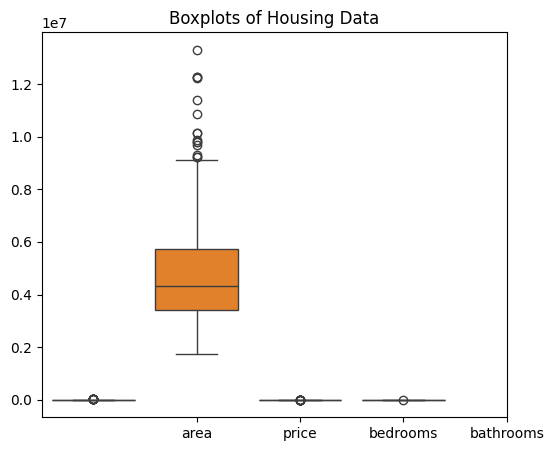

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
sns.boxplot([df['area'], df['price'], df['bedrooms'], df['bathrooms']])
plt.xticks([1,2,3,4], ['area', 'price', 'bedrooms', 'bathrooms'])
plt.title("Boxplots of Housing Data")
plt.show()


In [6]:
df['price'].describe()

count    5.410000e+02
mean     4.762121e+06
std      1.872154e+06
min      1.750000e+06
25%      3.430000e+06
50%      4.340000e+06
75%      5.740000e+06
max      1.330000e+07
Name: price, dtype: float64

In [7]:
Q3 = df['price'].quantile(.75)
Q1 = df['price'].quantile(.25)

IQR = Q3 - Q1
print(IQR)

2310000.0


In [8]:
upper_limit = Q3 + (1.5 * IQR) 
lower_limit = Q1 - (1.5 * IQR)

print(upper_limit)
print(lower_limit)

9205000.0
-35000.0


# capping

In [9]:
# df['price'] = np.where(
#   df['price'] > upper_limit,
#   upper_limit,

#   np.where(
#     df['price'] < lower_limit,
#     lower_limit,

#     df['price']
#   )
# )

In [10]:
df.head()

,price,area,bedrooms,bathrooms
0,13300000,7420,4,2
1,12250000,8960,4,4
2,12250000,9960,3,2
3,12215000,7500,4,2
4,11410000,7420,4,1


In [11]:
x = df[['area',	'bedrooms'	,'bathrooms']]
y = df['price']

In [12]:
print(x.shape)
print(y.shape)

(541, 3)
(541,)


In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=42, test_size=.2)

In [14]:
print(x_train.shape)
print(y_train.shape)

(432, 3)
(432,)


In [15]:
lr = LinearRegression()

In [16]:
model = lr.fit(x_train, y_train)
model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [17]:
y_pred = model.predict(x_test)
y_pred[:10]

array([4082870.51377927, 3976575.14313194, 5574801.96607934,
       3946205.0372327 , 4527300.98582907, 4606754.84054113,
       3991380.56975782, 4253210.78008844, 3207831.83755748,
       3828520.87687315])

In [18]:
df['predicted_price'] = model.predict(x)
df['error'] = df['price'] - df['predicted_price']
df.head()

,price,area,bedrooms,bathrooms,predicted_price,error
0,13300000,7420,4,2,6.918109e+06,6.381891e+06
1,12250000,8960,4,4,9.954961e+06,2.295039e+06
2,12250000,9960,3,2,7.450077e+06,4.799923e+06
3,12215000,7500,4,2,6.948479e+06,5.266521e+06
4,11410000,7420,4,1,5.691995e+06,5.718005e+06


In [19]:
print("R2 Score :", r2_score(y_test, y_pred))
print("MSE :", mean_squared_error(y_test, y_pred))
print("MAE :", mean_absolute_error(y_test, y_pred))

R2 Score : 0.47788485200720043
MSE : 2495978850529.2803
MAE : 1177521.7060855136
